In [3]:
import tensorflow as tf
w=tf.Variable([[0.5,1.0]])
x=tf.Variable([[2.0],[1.0]])
y=tf.matmul(w,x)
with  tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(y))

[[ 2.]]


In [4]:
tf.zeros([3,4],tf.int32)

<tf.Tensor 'zeros:0' shape=(3, 4) dtype=int32>

In [6]:
#建议大家用float32为主，无论是GPU还是CPU，都支持，不用它的话可能出现莫名其妙的错误
norm=tf.random_normal([2,3],mean=-1,stddev=4)
c=tf.constant([[1,2],[3,4],[5,6]])

shuff=tf.random_shuffle(c)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(norm))
    print(sess.run(shuff))

[[ 2.30889344 -5.7253809   0.6952318 ]
 [-5.68134594 -3.483711    3.61872196]]
[[3 4]
 [1 2]
 [5 6]]


In [7]:
state=tf.Variable(0)
new_value=tf.add(state,tf.constant(1))
update=tf.assign(state,new_value)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(state)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

<tf.Variable 'Variable_4:0' shape=() dtype=int32_ref>
1
2
3


In [9]:
w=tf.Variable([[0.5,1.0]])
x=tf.Variable([[2.0],[1.0]])
y=tf.matmul(w,x)
saver=tf.train.Saver()
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    saver_path=saver.save(sess,"F:\\hua\\test")
    print("Model saved in file:",saver_path)

Model saved in file: F:\hua\test


In [10]:
#tensorflow可以把numpy的格式转换成tensorflow
import numpy as np
a=np.zeros((3,3))
ta=tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(sess.run(ta))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [12]:
input1=tf.placeholder(tf.float32)
input2=tf.placeholder(tf.float32)
input=tf.multiply(input1,input2)
with tf.Session() as sess:
    print(sess.run([input],feed_dict={input1:[7.0],input2:[2.0]}))
    

[array([ 14.], dtype=float32)]


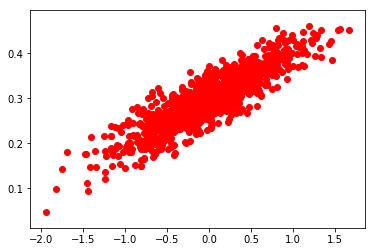

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
num_points=1000
vactors=[]
for i in range(num_points):
    x1=np.random.normal(0.0,0.55)
    y1=x1*0.1+0.3+np.random.normal(0.0,0.03)
    vactors.append([x1,y1])
#生成一些样本
x_data=[v[0] for v in vactors]
y_data=[v[1] for v in vactors]
plt.scatter(x_data,y_data,c='r')
plt.show()

W= [ 1.12544405] b= [ 0.01] loss= 0.426121
W= [ 0.34774226] b= [ 0.30078006] loss= 0.0203632
W= [ 0.1208424] b= [ 0.29932189] loss= 0.000990399
W= [ 0.10016818] b= [ 0.29899737] loss= 0.000845763
W= [ 0.0997403] b= [ 0.29899085] loss= 0.000845702
W= [ 0.09974119] b= [ 0.29899085] loss= 0.000845702
W= [ 0.09974119] b= [ 0.29899085] loss= 0.000845702
W= [ 0.09974119] b= [ 0.29899085] loss= 0.000845702
W= [ 0.09974119] b= [ 0.29899082] loss= 0.000845702
W= [ 0.09974119] b= [ 0.29899082] loss= 0.000845702


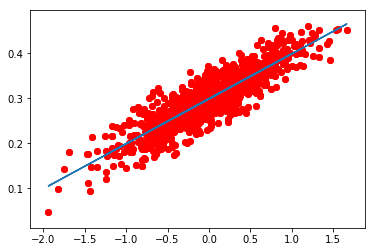

In [37]:
W=tf.Variable(tf.random_normal(shape=[1]),name='w')
b=tf.Variable(tf.zeros([1]),name='b')
y_=tf.add(tf.multiply(W,x_data),b)
loss=tf.reduce_mean(tf.square(y_-y_data),name='loss')
optimizer=tf.train.AdamOptimizer(0.01).minimize(loss)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(1000):
        _,losses=sess.run([optimizer,loss])
        if(i%100==0):
            print("W=",sess.run(W),"b=",sess.run(b),"loss=",losses)
    plt.scatter(x_data,y_data,c='r')
    plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
    plt.show()  